In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random as rand
import math 
import string as strin
matplotlib.style.use("ggplot")
%matplotlib inline

## **Testing random choice **

In [2]:
%%time
p = 0.4
N = 10**1
p= np.random.choice([1,0], N,p=[p, 1-p]).sum()/N
print(p)


0.2
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 498 µs


## testing average matrix from numpy

In [3]:
data = np.array([[0, 1],
       [2, 3],
       [4, 5]])
np.average(data, axis=0,weights=[1./4, 2./4, 1/4])

array([ 2.,  3.])

# Class for a single population

In [4]:
class population:
    def __init__(self, plist, N):
        self.plist = np.array(plist)
        self.N = N
        
        self.Rb = 1
        self.k = 20000
        self.rd = 10**(-3)
    
    def update(self):

        birth = int(self.N*self.Rb*(1 - self.N/self.k))

        if birth == 0: Birthplist = np.zeros(len(self.plist)); print('no birth')
        else:Birthplist = np.array([np.random.choice([1,0], birth,p=[pi, 1-pi]).sum()/birth for pi in self.plist])

        death = int(self.rd*self.N**2)
        survived = int(self.N - death)
        if survived == 0: Survivingplist = np.zeros(len(self.plist));print('ish')
        Survivingplist = np.array([np.random.choice([1,0], survived ,p=[pi, 1-pi]).sum()/survived for pi in self.plist])

        self.N += birth - death
        if self.N <= 0: print("dead pop")

        birthNSurvivedMatrix = np.array([Birthplist, Survivingplist ]) #self.plist
        self.plist = np.average(birthNSurvivedMatrix, axis = 0, weights=[birth/self.N,survived/self.N])
        

        
        
    def Hlist(self): return np.array([2*p*(1-p) for p in self.plist])
    def averageH(self): return self.Hlist().mean()
        

# One Population Simulation

In [5]:
plista = np.array([np.random.rand() for i in range(10)])
Na = 200
sidea = population(plista, Na)

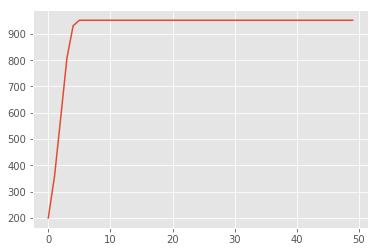

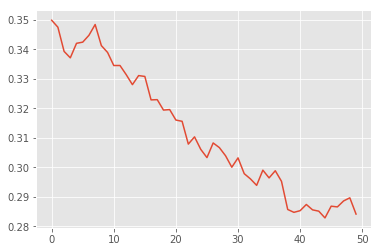

CPU times: user 352 ms, sys: 376 ms, total: 728 ms
Wall time: 317 ms


In [6]:
%%time
history = []
Hhistory = []
for i in range(50): 
    history += [sidea.N] 
    Hhistory += [sidea.averageH()]
    sidea.update()
    
plt.plot(history, label = "popsize");
plt.show()
plt.plot(Hhistory, label = 'H');
plt.show()


# Making class to Simulate migration

In [7]:
class wholePop:
    def __init__(self, populationA, populationB): 
        self.popa = populationA
        self.popb = populationB
        self.alphaA = .2
        self.alphaB = .2
        self.deathprob = .3
        self.nRoadsCrossedPerTimeUnit = 3
    def migrate(self):
        
        AtoB = self.alphaA*self.popa.N
        survivedAtoB = (1-self.deathprob)*AtoB
        BtoA = self.alphaB*self.popb.N
        survivedBtoA = (1- self.deathprob)*BtoA
        
        self.popa.plist = np.average([self.popa.plist, self.popb.plist], axis = 0 , weights = [self.popa.N-AtoB,survivedBtoA])
        self.popb.plist = np.average([self.popb.plist, self.popa.plist], axis = 0 , weights = [self.popb.N-BtoA,survivedAtoB])
        self.popa.N += survivedBtoA - AtoB
        self.popb.N += survivedAtoB - BtoA
        
        
        
    def update(self):
        self.popa.update() 
        self.popb.update()
        self.migrate()
        
    def FSTlist(self):
        PfreqMatrix = np.array([self.popa.plist, self.popb.plist])
        avgPFreq = np.average(PfreqMatrix, axis = 0 , weights = [.5,.5])
        expectedHlist = np.array([2*p*(1-p) for p in avgPFreq])
        
        HlistMatrixFromPops = np.array([self.popa.Hlist(), self.popb.Hlist()])
        ObservedHlistBothPops = np.average(HlistMatrixFromPops, axis = 0,  weights = [.5,.5])
        
        with np.errstate(divide='ignore', invalid='ignore'):
            subtraction = (expectedHlist - ObservedHlistBothPops)
            result = np.true_divide(subtraction,expectedHlist)
            result[result == np.inf] = 0
            result = np.nan_to_num(result)
        
        return result
    
    def FST(self): return self.FSTlist().mean()
        
        

# Adding another population

In [8]:
plist = np.array([np.random.rand() for i in range(10)])
Na = 500
sidea = population(plist, Na)
sideb = population(plist, Na)
bothsides = wholePop(sidea, sideb)


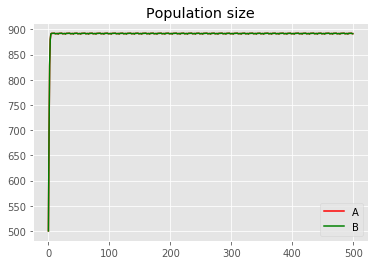

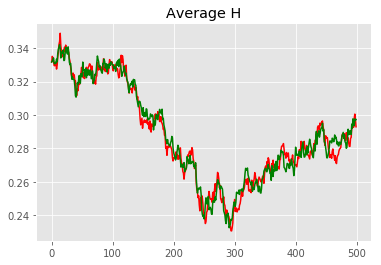

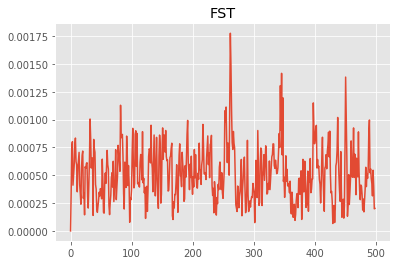

CPU times: user 1.66 s, sys: 692 ms, total: 2.35 s
Wall time: 1.54 s


In [9]:
%%time
historyA = []; historyB = []
HhistoryA = []; HhistoryB = []
FST_list = []
for i in range(500): 
    historyA += [bothsides.popa.N] 
    HhistoryA += [bothsides.popa.averageH()]
    historyB += [bothsides.popb.N] 
    HhistoryB += [bothsides.popb.averageH()]
    FST_list += [bothsides.FST()]
    bothsides.update()

    
plt.plot(historyA, label = "A", color = 'r');
plt.plot(historyB, label = "B", color = 'g');
plt.title("Population size")
plt.legend()
plt.show()
plt.plot(HhistoryA, label = 'A', color = 'r');
plt.plot(HhistoryB, label = 'B', color = 'g');
plt.title('Average H')
plt.show()
plt.plot(FST_list)
plt.title('FST')
plt.show()

## reset values
plist = np.array([np.random.rand() for i in range(10)])
Na = 100
sidea = population(plist, Na)
sideb = population(plist, Na)
bothsides = wholePop(sidea, sideb)

## FST heatmap altering migration and death

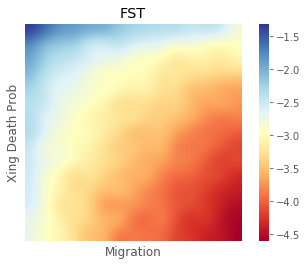

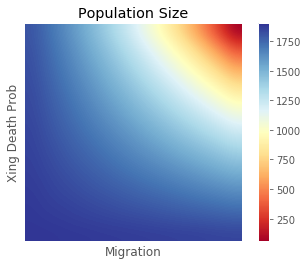

CPU times: user 14min 45s, sys: 848 ms, total: 14min 46s
Wall time: 14min 46s


In [10]:
%%time
XD, M = 15, 15
heatmap = np.zeros((XD,M))
heatmap_pop = np.zeros((XD,M))
plist = np.array([np.random.rand() for i in range(50)])
Na = 500

for Dcounter, deathrateI in enumerate(np.linspace(0.05, .95 , XD)):
    for Mcounter, migrationI in enumerate(np.linspace(0.05, .52, M)):
        sidea = population(plist, Na)
        sideb = population(plist, Na)
        bothsides = wholePop(sidea, sideb)
        bothsides.deathprob = deathrateI
        bothsides.alphaA, bothsides.alphaB = migrationI, migrationI
        
        for i in range(500): bothsides.update()
        heatmap[Dcounter, Mcounter] = math.log10(bothsides.FST())
        heatmap_pop[Dcounter, Mcounter] = bothsides.popa.N + bothsides.popb.N
        
plt.imshow(heatmap, origin = 'lower', interpolation='bicubic', cmap = 'RdYlBu')
plt.title('FST')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap", figsize= (10,10),  bbox_inches='tight', DPI = 800)
plt.show()
plt.close()

plt.imshow(heatmap_pop, origin = 'lower', interpolation='bicubic', cmap = 'RdYlBu')
plt.title('Population Size')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap_pop", figsize= (10,10),  bbox_inches='tight', DPI = 800)
plt.show()
            
        
        

# Infinite Allele Model 

In [11]:
class microsattelite:
    def __init__(self, initial_list, newNames = True):
        self.microsat = np.array(initial_list)
        self.mutation_rate = 10**(-2)
        self.initialAlleleCount = len(initial_list)
        self.s = strin.ascii_lowercase + strin.digits
        if newNames == True:
            self.satNames = ["ORI"+"".join([rand.choice(self.s) for k in range(3)]) for i in range(len(initial_list))]
        else: 
            self.satNames = newNames
        
    def Allele_count(self):
        return len(self.microsat)
        
    def New_mutation(self, N):
        if N <= 0: print('zero division here'); N= 1
        self.microsat*=((N-1)/N)
        self.microsat = np.append(self.microsat, [1/N])
        self.satNames += ["".join([rand.choice(self.s) for k in range(5)])]

    def number_of_mutation_that_occured(self, N, sigma): 
        return np.random.choice([1,0], N,p=[sigma, 1-sigma]).sum()
    
    
    #tested and working
    def sample_generator(self, Nsamples, rep = True):
        if Nsamples <= 0: print('major error here')
        probs  = np.array([max(0, i) for i in self.microsat])
        probs*= 1/probs.sum()
        new_list = np.zeros(self.Allele_count())
        alleleSamples = np.random.choice(self.Allele_count(), Nsamples ,p=probs, replace= rep)
        for i in alleleSamples: new_list[i] += 1
            
        return microsattelite(new_list/Nsamples, self.satNames)
    
    def Heterozygosity(self):
        return 1 - np.array([x**2 for x in self.microsat]).sum()
    
    def trim_null_microsats(self, N):
        result = []
        result_names =[]
        for position,value in enumerate(self.microsat):
            if value >= 10**(-math.log10(N)):
                result += [value]
                result_names += [self.satNames[position]]
        
        self.microsat = np.array(result)
        self.satNames = result_names
        
        #self.microsat = self.microsat[self.microsat > 10**(-math.log10(N))] 
        self.microsat *= 1/self.microsat.sum()
        
    def nonreplaceSampleGen(self, N_sample, N):

        new_list = np.zeros(self.Allele_count())
        FULLPOP = np.array([])
        for counter, alleleFreq in enumerate(self.microsat):
            FULLPOP =np.append(FULLPOP, np.full(int(N*alleleFreq), counter))
        SAMPLE = np.random.choice(FULLPOP, int(N_sample), replace = False)
        for i in SAMPLE: new_list[int(i)] += 1
        
        samplefreq = new_list/new_list.sum()
        
        return microsattelite(samplefreq, self.satNames)
           

            
    
def generate_random_microsatellite_list(size, nalleles):
    tempList = []
    for j in range(size):
        randomprobs = np.array([rand.random() for i in range(nalleles)])
        randomprobs *= 1/randomprobs.sum()
        tempList += [microsattelite(randomprobs)]
    return np.array(tempList)
    
        
#tested and working        
def weighted_avg_microsat(microsat1, n1, microsat2, n2):
    if n1+ n2<=0: print('error_avg microsat'); return 0
    avg = [(microsat1.microsat[i]*n1 + microsat2.microsat[i]*n2)/(n1+n2) for i in range(microsat1.Allele_count())]
    return microsattelite(np.array(avg), microsat1.satNames)

def migrated_microsat_freq(microsatTotal, ntotal, microsatstayed, nstayed): #funciona
    avg = [(microsatTotal.microsat[i]*ntotal - microsatstayed.microsat[i]*nstayed)/(ntotal-nstayed) for i in range(microsatTotal.Allele_count())]
    return microsattelite(np.array(avg), microsatTotal.satNames)

class population_IAM:
    def __init__(self, plist, N):
        self.microsatLIST = np.array(plist)
        self.N = N
        self.Rb = 1
        self.k = 20000
        self.mutationrate = 10**(-2.5)
        self.rd = 10**(-3)
            
    def update(self):

        birth = int(self.N*self.Rb*(1 - self.N/self.k))

        Birthsamples = np.array([eachmicrosat.sample_generator(birth) for eachmicrosat in self.microsatLIST])

        death = self.rd*self.N**2
        survived = int(self.N - death)
        if survived == 0: Survivingplist = np.zeros(len(self.plist));print('ish')
        
        Survivingsamples = np.array([eachmicrosat.nonreplaceSampleGen(survived,self.N) for eachmicrosat in self.microsatLIST])
        self.N = birth + survived
        if self.N <= 0: print("dead pop")

        self.microsatLIST = [weighted_avg_microsat(Birthsamples[i],birth, Survivingsamples[i], survived) for i in range(len(self.microsatLIST))]
        self.microsatLIST = np.array(self.microsatLIST)
        
        for eachsat in self.microsatLIST: 
            eachsat.trim_null_microsats(self.N)
            for i in range(eachsat.number_of_mutation_that_occured(birth, self.mutationrate)):  eachsat.New_mutation(self.N)
        
    def Hlist(self): return np.array([x.Heterozygosity() for x in self.microsatLIST])
    def averageH(self): return self.Hlist().mean()
        
        
        

testing weighted avg function and heterozygosity function

In [12]:
%%time
a = microsattelite([.5,.5, .0])
b = microsattelite([.3, .5, .0])
c =weighted_avg_microsat(a, 1000000, b,5)
print(c.microsat)
a.New_mutation(100)
print(a.microsat)
print(a.satNames)
print(a.satNames[0])
a.trim_null_microsats(1000)
print(a.microsat)
print(a.satNames)
print(a.nonreplaceSampleGen(499, 500).microsat )
d = migrated_microsat_freq(a, 100, b,9 )
print(d.microsat)


[ 0.499999  0.5       0.      ]
[ 0.495  0.495  0.     0.01 ]
['ORIid7', 'ORI215', 'ORIeq0', 'bkb8p']
ORIid7
[ 0.495  0.495  0.01 ]
['ORIid7', 'ORI215', 'bkb8p']
[ 0.49498998  0.49498998  0.01002004]
[ 0.51428571  0.49450549  0.01098901]
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.39 ms


testing sample generator function

In [13]:
%%time
a = microsattelite([.5,.5])
b = a.sample_generator(100)
print(b.microsat)



[ 0.51  0.49]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 749 µs


testing initial microsat generator

In [14]:
a = generate_random_microsatellite_list(3, 2)
print(a[2].microsat.sum())

1.0


## Testing a single population in the IAM model

[ 0.56564165  0.06170548  0.37265287]
['ORIpvm', 'ORIoyl', 'ORI81w']


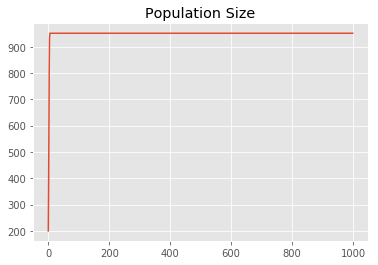

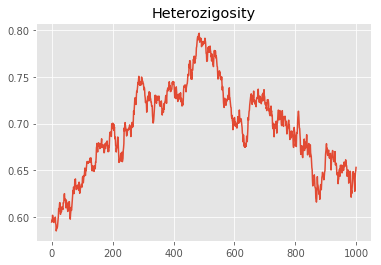

[18, 16, 17, 11, 16]
[ array([ 0.34345171,  0.23141106,  0.06701497,  0.23874082,  0.01465952,
        0.04816701,  0.00209422,  0.00209422,  0.02198929,  0.01361242,
        0.00628265,  0.00209422,  0.00314133,  0.00104711,  0.00104821,
        0.00104931,  0.00105042,  0.00105152])
 array([ 0.03473688,  0.32000035,  0.3568425 ,  0.08631589,  0.1252633 ,
        0.0031579 ,  0.01473686,  0.00526316,  0.03578951,  0.0031579 ,
        0.00421053,  0.0031579 ,  0.00210527,  0.00210527,  0.00210527,
        0.00105152])
 array([ 0.62093625,  0.04293151,  0.17486737,  0.0314133 ,  0.03350752,
        0.02198931,  0.00418844,  0.04607284,  0.00732977,  0.00732977,
        0.00314133,  0.00104601,  0.00104711,  0.00104821,  0.00104931,
        0.00105042,  0.00105152])
 array([ 0.68210602,  0.0642106 ,  0.14947385,  0.02421055,  0.00842106,
        0.00947369,  0.01368423,  0.0063158 ,  0.01368423,  0.02736845,
        0.00105152])
 array([ 0.06708558,  0.5566007 ,  0.03563922,  0.11006229,

In [15]:
%%time

sidea = population_IAM(generate_random_microsatellite_list(5, 3), 200)
print(sidea.microsatLIST[0].microsat)
print(sidea.microsatLIST[0].satNames)
history = []
Hhistory = []
for i in range(1000): 
    history += [sidea.N] 
    Hhistory += [sidea.averageH()]
    sidea.update()
    
plt.plot(history );
plt.title("Population Size")
plt.show()
plt.plot(Hhistory);
plt.title('Heterozigosity')
plt.show()
print([x.Allele_count() for x in sidea.microsatLIST])
print(np.array([sidea.microsatLIST[n].microsat for n in range(5)]))
print(np.array([sidea.microsatLIST[n].satNames for n in range(5)]))



# Making two populations with migration in the IAM model

In [16]:
def unify_alleles_avg(microsat1, n1, microsat2, n2): #tested and working 
    result = []
    alll = set(microsat1.satNames) | set(microsat2.satNames)
    for i in alll:
        if i in microsat1.satNames: firstpart = microsat1.microsat[microsat1.satNames.index(i)]*n1
        else: firstpart = 0
        if i in microsat2.satNames: secondpart = microsat2.microsat[microsat2.satNames.index(i)]*n2
        else: secondpart = 0
        result += [(firstpart + secondpart)/(n1+n2)]
    return microsattelite(np.array(result), list(alll))


class WholePop_IAM:
    def __init__(self, populationA, populationB): 
        self.popa = populationA
        self.popb = populationB
        self.alphaA = .02
        self.alphaB = .02
        self.deathprob = .9
        self.nRoadsCrossedPerTimeUnit = 3
        
        
    def migrate(self):
        
        AtoB = self.alphaA*self.popa.N
        survivedAtoB = (1-self.deathprob)*AtoB
        stayedAN = self.popa.N-AtoB

        
        stayedinAFreq = np.array([eachmicrosat.nonreplaceSampleGen(stayedAN,int(self.popa.N)) for eachmicrosat in self.popa.microsatLIST])
        AtoBfreq = np.array([migrated_microsat_freq(self.popa.microsatLIST[i],self.popa.N, stayedinAFreq[i], stayedAN) for i in range(len(self.popa.microsatLIST))])

                
        
        BtoA = self.alphaB*self.popb.N
        survivedBtoA = (1- self.deathprob)*BtoA
        stayedBN = int(self.popb.N-BtoA)
        
        stayedinBFreq = np.array([eachmicrosat.nonreplaceSampleGen(stayedBN ,int(self.popb.N)) for eachmicrosat in self.popb.microsatLIST])
        BtoAfreq = np.array([migrated_microsat_freq(self.popb.microsatLIST[i],self.popb.N, stayedinBFreq[i], stayedBN) for i in range(len(self.popb.microsatLIST))])
        
        self.popa.microsatLIST = [unify_alleles_avg(stayedinAFreq[i],stayedAN,BtoAfreq[i], survivedBtoA) for i in range(len(self.popa.microsatLIST))]
        self.popb.microsatLIST = [unify_alleles_avg(stayedinBFreq[i],stayedBN,AtoBfreq[i], survivedAtoB) for i in range(len(self.popb.microsatLIST))]
        
        self.popa.N += survivedBtoA - AtoB
        self.popb.N += survivedAtoB - BtoA
        
    def update(self):
        self.popa.update() 
        self.popb.update()
        self.migrate()
        
    def FSTlist(self):
        
        expectedFreqs = [unify_alleles_avg(self.popa.microsatLIST[i],self.popa.N,self.popb.microsatLIST[i],self.popb.N) for i in range(len(self.popa.microsatLIST))]

        global_pop = population_IAM(expectedFreqs, self.popa.N + self.popb.N)
        expectedHlist = global_pop.Hlist()
        
        HlistMatrixFromPops = np.array([self.popa.Hlist(), self.popb.Hlist()])
        ObservedHlistBothPops = np.average(HlistMatrixFromPops, axis = 0,  weights = [.5,.5])
        
        with np.errstate(divide='ignore', invalid='ignore'):
            subtraction = (expectedHlist - ObservedHlistBothPops)
            result = np.true_divide(subtraction,expectedHlist)
            result[result == np.inf] = 0
            result = np.nan_to_num(result)
        
        return result
    
    def FST(self): return self.FSTlist().mean()
        

In [17]:
plist = np.array([np.random.rand() for i in range(10)])
Na = 200
sidea = population_IAM(generate_random_microsatellite_list(5, 3), Na)
sideb = population_IAM(generate_random_microsatellite_list(5, 3), Na)

sideb = population_IAM(sidea.microsatLIST, Na)
bothsides = WholePop_IAM(sidea, sideb)
print(bothsides.popa.microsatLIST[0].microsat)

print(bothsides.popb.microsatLIST[0].microsat)



[ 0.30166729  0.42721564  0.27111707]
[ 0.30166729  0.42721564  0.27111707]


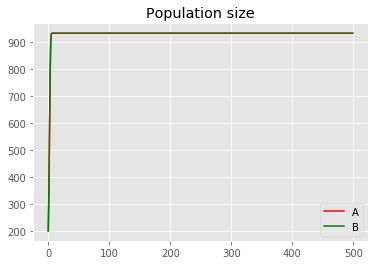

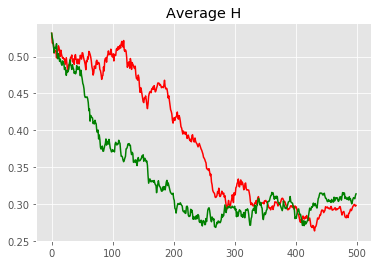

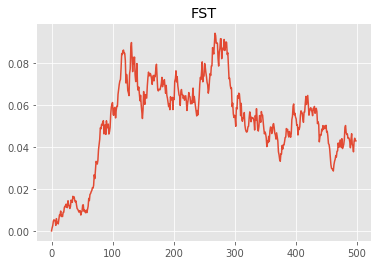

[ list(['b8huk', 'ORIh0n', 'vgpht', 'v32gu', 'uipi7', 'ORItap', 'ORI659', 'y3gzm', 'u1254', 's1hfs', '0b9zq', 'aumh8'])
 list(['hylui', '50zom', 'ORIrar', 'wvjc0', 'phst1', 'x5km9', 'k0rs4', 'fv90h', 'pdg3h'])
 list(['ORInr5', '3d05k', '7wovd', 'ORI9p7', 'd92ko', 'm8jna', 'hwzkf', 'axti6', 'yhzs3'])
 list(['ORI3gp', '0kpiq', 'ia3zo', 'v13zq', 't2jk0', 'g6kn9', 'tju4o', 'h1ua6', 'c84dx', 'e8prj', 'dl1b8', 'qtavu', 'qf1xu'])
 list(['0tiud', 'd1u4x', 'ozpjp', 'st9nf', 'ORI1ks', 'ep2rp', 'ORIomu', 'ORI7aq'])]
[ list(['b8huk', 'ORIh0n', 'vgpht', 'v32gu', 'uipi7', 'ORItap', 'ORI659', 'y3gzm', 'u1254', 's1hfs', '0b9zq', 'aumh8'])
 list(['hylui', '50zom', 'x5km9', 'ORIrar', 'k0rs4', 'wvjc0', 'phst1', 'fv90h', 'pdg3h'])
 list(['ORInr5', '3d05k', '7wovd', 'ORI9p7', 'd92ko', 'm8jna', 'hwzkf', 'axti6', 'yhzs3'])
 list(['ORI3gp', '0kpiq', 'ia3zo', 'g6kn9', 'v13zq', 't2jk0', 'tju4o', 'h1ua6', 'e8prj', 'c84dx', 'dl1b8', 'qtavu', 'qf1xu'])
 list(['d1u4x', 'ozpjp', 'ORI1ks', 'ep2rp', 'ORIomu', '0tiud',

In [18]:
%%time
historyA = []; historyB = []
HhistoryA = []; HhistoryB = []
FST_list = []
for i in range(500): 
    
    historyA += [bothsides.popa.N]
    HhistoryA += [bothsides.popa.averageH()]
    historyB += [bothsides.popb.N] 
    HhistoryB += [bothsides.popb.averageH()]
    FST_list += [bothsides.FST()]
    bothsides.update()

    
plt.plot(historyA, label = "A", color = 'r');
plt.plot(historyB, label = "B", color = 'g');
plt.title("Population size")
plt.legend()
plt.show()
plt.plot(HhistoryA, label = 'A', color = 'r');
plt.plot(HhistoryB, label = 'B', color = 'g');
plt.title('Average H')
plt.show()
plt.plot(FST_list)
plt.title('FST')
plt.show()

print(np.array([bothsides.popa.microsatLIST[n].satNames for n in range(5)]))
print(np.array([bothsides.popb.microsatLIST[n].satNames for n in range(5)]))


In [19]:
%%time
XD, M = 15, 15
heatmap = np.zeros((XD,M))
heatmap_pop = np.zeros((XD,M))
Na = 500

for Dcounter, deathrateI in enumerate(np.linspace(0.1, .8 , XD)):
    for Mcounter, migrationI in enumerate(np.linspace(0.1, .52, M)):
        sidea = population_IAM(generate_random_microsatellite_list(5, 3), Na)
        sideb = population_IAM(sidea.microsatLIST, Na)
        bothsides = WholePop_IAM(sidea, sideb)
        bothsides.deathprob = deathrateI
        bothsides.alphaA, bothsides.alphaB = migrationI, migrationI
        
        for i in range(1000): bothsides.update()
        heatmap[Dcounter, Mcounter] = math.log10(bothsides.FST())
        heatmap_pop[Dcounter, Mcounter] = bothsides.popa.N + bothsides.popb.N
        print(Dcounter, Mcounter)
        
        
        

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 0
14 1
14 2
14 3
14 4
14 5


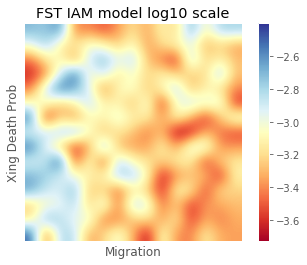

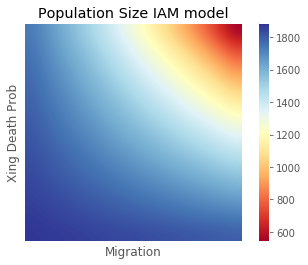

In [20]:
        
plt.imshow(heatmap, origin = 'lower', cmap ='RdYlBu', interpolation = 'bicubic')
plt.title('FST IAM model log10 scale')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap_IAM_log10", figsize= (15,15),  bbox_inches='tight', DPI = 600)
plt.show()
plt.close()

plt.imshow(heatmap_pop, origin = 'lower',  cmap = 'RdYlBu', interpolation='bicubic')
plt.title('Population Size IAM model')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap_popIAM", figsize= (10,10),  bbox_inches='tight', DPI = 600)
plt.show()
            
        

In [21]:
heatmap_n = heatmap[:]
for i in range(heatmap_n.shape[0]):
    for j in range(heatmap_n.shape[1]):
        heatmap_n[i,j] = 10**heatmap_n[i,j]

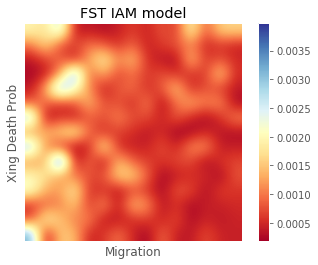

In [22]:
plt.imshow(heatmap_n, origin = 'lower', cmap ='RdYlBu', interpolation = 'bicubic')
plt.title('FST IAM model')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Migration')
plt.ylabel('Xing Death Prob')
plt.colorbar()
plt.savefig("heatmap_IAM", figsize= (15,15),  bbox_inches='tight', DPI = 600)
plt.show()
plt.close()